## Project 2
by Daryna Kondratiuk and Trang Vu
## HealthCare

<a id="contents"></a>
<div>
    <h1>
    Table of Contents
    </h1>
    <br>
    1. <a href='#intro'>Objective of the Proposed Research</a><br>
    2. <a href='#dataExp'>Data Exploration</a><br>
    3. <a href='#dataClean'>Data Cleaning</a><br>
    4. <a href='#adapt'>Adaption</a><br>
    5. <a href='#visual'>Descriptive Static Visualization</a><br>
</div>

<a id="intro"></a>
<div>
    <h1>
        Objective of the Proposed Research 
    </h1> 
</div>

Our dataset consists of four databases: Cleverland, Hungary, Switzerland and Long Beach.In our morden life,heart disease cases increase significantly that triggers and threaten people around the world and many scientists has been working days by days to define solution and factors that could affect heart disease nowsadays. In this project, We would like to utilize this dataset to get a comprehensive overview of factors that could trigger or impact heart 
disease and gain some insight to provide and predict the solution based on the pattern and different aspects like excercise, depression, blood pressure, heart rates, vessels and so on. 

We will first explore the dataset to gain some brief information and statistic overview of the dataset, important 
attributes and information. We will also do some research in the background to have a proper knowdlege of the basic 
medical field regarding heart disease, blood pressure and some typical synonym involved in the dataset. Moving along
after finishing exploration, we will discuss and decide what elements we would like to keep for our further steps by 
utilize data cleaning. With data adaptation, we will create columns to keep track of the heart disease in each case by assigning string value for better retrieval and utilization of information in the future. We then will proceed to 
further analyzation and data clustering to gain persepctives and insights about the matter by focusing in some prospect factor like depression and excerise for causing heart disease. 

In our project, our stakeholder will be the American Heart Association since they are the nation's oldest and largest voluntary organization devoted to fighting heart disease and stroke. We would like to provide useful insight to help the American Heart Association find solution and educate people to prevent this 
kind of diease while making decision about what type of support they could provide to help people gain better 
health. 

<a href="#contents">Table of Contents</a>

<a id="dataExp"></a>
<div>
    <h1>
        Data Exploration 
    </h1> 
</div>

Data Exploration: Describe your data with code (and text) depicting at least 4 different aspects of your it.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Print out the names of columns.

In [2]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Let's see the variety of age that we have here

In [3]:
df.age.unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74])

In [4]:
# Let's see some statistic information of column age
df.age.describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

In [5]:
# Let's see some statistic information of column target
df.target.describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [6]:
# Let's see some statistic information of column sex

In [7]:
df.sex.describe()

count    1025.000000
mean        0.695610
std         0.460373
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [8]:
# Dimension of the dataset
df.shape

(1025, 14)

Check the type of values in columns

In [9]:
#Let's get a brief overview of data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Check if there are any NA in the dataframe.

In [10]:
# Using isnull() and any() function 
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [11]:
# Using isnull() and any() function 
# to check if any NA in the dataframe
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

<a id="dataClean"></a>
<div>
    <h1>
        Data Cleaning
    </h1> 
</div>

Since our data doesn't have any NA, we will focus on the choosing the columns which will be used for our analysis.

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
heart_data = df[['age','sex', 'trestbps', 'chol', 'thalach', 'oldpeak','target']]
heart_data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target
0,52,1,125,212,168,1.0,0
1,53,1,140,203,155,3.1,0
2,70,1,145,174,125,2.6,0
3,61,1,148,203,161,0.0,0
4,62,0,138,294,106,1.9,0


So, to process clustering analysis, we will use next columns: Age, Sex, Blood pressure, Serum Cholestoral, Heart Rate, ST depression and Target.

<a href="#contents">Table of Contents</a>

<a id="adapt"></a>
<div>
    <h1>
        Adaptation
    </h1> 
</div>

Adaptation: Create at least two additional columns that are necessary for your study. They can be calculated columns or aggregated columns.

We will rename our columns to make our dataframe more clear.

In [14]:
heart_data.columns = ['age', 'gender', 'bl_pres', 'cholest', 'heart_rate', 'depress', 'target']
heart_data.head()

,age,gender,bl_pres,cholest,heart_rate,depress,target
0,52,1,125,212,168,1.0,0
1,53,1,140,203,155,3.1,0
2,70,1,145,174,125,2.6,0
3,61,1,148,203,161,0.0,0
4,62,0,138,294,106,1.9,0


Since our dataset use a boolean values for sex and heart disease column, we will change 0 to male and 1 to female in column sex. For column heart disease will change 0 to "no disease" and 1 to "heart disease".

In [15]:
# Create a new col heart_dis and using loc to assign the value 'no disease'
#to a new col if the value is 0
heart_data.loc[heart_data.target == 0, 'heart_dis'] = "no disease"

//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
# Create a new col heart_dis and using loc to assign the value 'no disease'
#to a new col if the value is 1
heart_data.loc[heart_data.target == 1, 'heart_dis'] = "disease"

In [17]:
# Create a new col gend_type and using loc to assign the value 'male'
#to a new col if the value is 0
heart_data.loc[heart_data.gender == 0, 'gend_type'] = "male"

In [18]:
# Create a new col gend_type and using loc to assign the value 'female'
#to a new col if the value is 1
heart_data.loc[heart_data.gender == 1, 'gend_type'] = "female"

Create a new column and split the data into three different age groups.

In [19]:
heart_data.loc[(heart_data.age >= 29) & (heart_data.age <= 45) , 'age_group'] = "29-45"

In [20]:
heart_data.loc[(heart_data.age > 45) & (heart_data.age <= 60) , 'age_group'] = "46-60"

In [21]:
heart_data.loc[(heart_data.age > 60) , 'age_group'] = "over 60"

In [22]:
# Let's see what we have here
heart_data.head(5)

,age,gender,bl_pres,cholest,heart_rate,depress,target,heart_dis,gend_type,age_group
0,52,1,125,212,168,1.0,0,no disease,female,46-60
1,53,1,140,203,155,3.1,0,no disease,female,46-60
2,70,1,145,174,125,2.6,0,no disease,female,over 60
3,61,1,148,203,161,0.0,0,no disease,female,over 60
4,62,0,138,294,106,1.9,0,no disease,male,over 60


In this section, we decide to add three columns which are gend_type, heart_dis and age_group, which could help us to better retrive and analyze information in more sophisticated way. We utilize loc and logical condition statements to assign value in heart_dis and gend_type according to target and gender column respectively. In age_group column, we divide our data into three main groups based on the variety of ages that we have. So we have 29-45 years old group, 46-60 years old group and over 60 years old.


<a href="#contents">Table of Contents</a>

<a id="visual"></a>
<div>
    <h1>
        Descriptive Visualization
    </h1> 
</div>

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Pie Chart

In [25]:
# Utilize value_counts() function to count the frequency of the age group
heart_data["age_group"].value_counts()

46-60      540
over 60    272
29-45      213
Name: age_group, dtype: int64

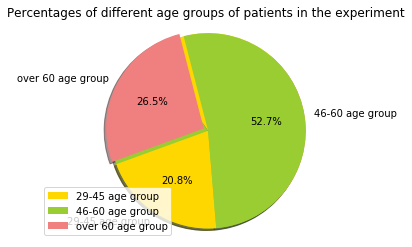

In [26]:
#calculate percentage of patients in each age group
group46to60 = 540/(540+272 + 213)
group29to45 = 213/(540+272 + 213)
groupover60 = 272/(540+272 + 213)
labels = '29-45 age group', '46-60 age group', 'over 60 age group'
sizes = [group29to45, group46to60 , groupover60]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0.05)  # explode some slices 
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=50)
plt.legend(patches, labels, loc="best")

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=200)

plt.axis('equal')
plt.title('Percentages of different age groups of patients in the experiment')
plt.show()

Pie chart shows us the percantage of patients who belongs to different age groups. So 52.7% of patients are in the age range 46-60, 26.5% are in the age of 60 or older and only 20.8 % of patients are in the age between 29-45 years old.

## 2. Categorical Scatter Plot

In [27]:
vis_data1 = heart_data[['age_group', 'heart_rate']]
vis_data1.head()

,age_group,heart_rate
0,46-60,168
1,46-60,155
2,over 60,125
3,over 60,161
4,over 60,106


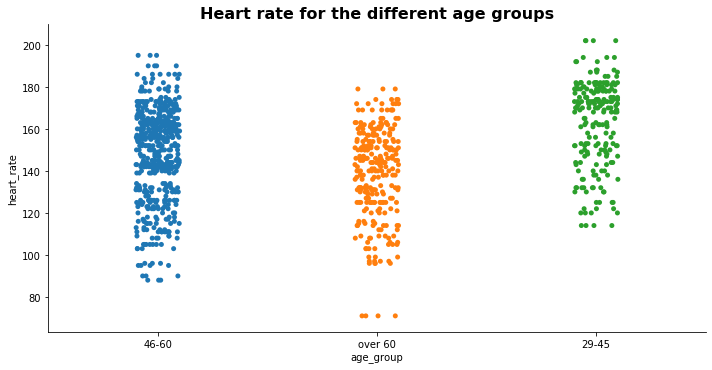

In [28]:
sns.catplot(x='age_group', y='heart_rate', data=vis_data1, aspect=2)
plt.title('Heart rate for the different age groups', weight='bold', fontsize=16)
plt.show()


In this categorical scatter plot that we just created, we visualize the differences in the heart rate for different age group. In accordance to the chart above, it is significant to notify that heart rate is witnessed to be really high with maximum over 200 in the 29-45 age group. Meanwhile, 45-60 has lower frequencies and level in heart rate with the most distribution of data being around 100 in heart rate. Over 60 age group has the lowest heart_rate with 180 being the maximum and below 80 as the minimum. 

## 3. Box Plot

In [29]:
vis_data2=heart_data[['age_group','depress', "heart_dis"]]

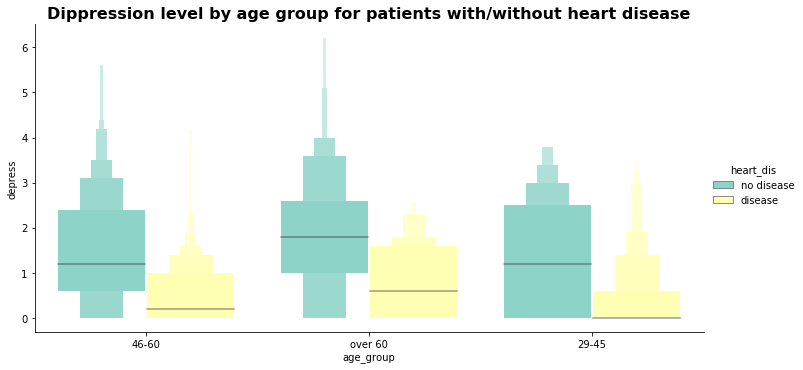

In [30]:
sns.catplot(x='age_group', y='depress', data=vis_data2, kind='boxen', hue='heart_dis', palette="Set3", saturation = 1, aspect=2)
plt.title('Dippression level by age group for patients with/without heart disease', weight='bold', fontsize=16)
plt.show()

The box plot shows us that people in the age group 29-45 with low depression level are more likely to have a heart disease. And actually it is common for aech age group. Otherwise, people with the middle depression level does not seem to have a heart disease.

## 4. Violin Chart

In [31]:
vis_data3 = heart_data[['heart_dis','bl_pres', "gend_type"]]

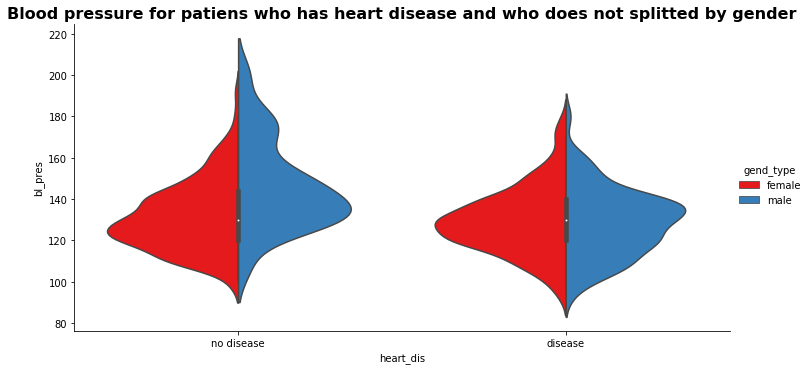

In [32]:
sns.catplot(x='heart_dis', y='bl_pres', data=vis_data3, kind='violin', hue='gend_type', palette="Set1", saturation = 2, split=True, aspect=2)
plt.title('Blood pressure for patiens who has heart disease and who does not splitted by gender', weight='bold', fontsize=16)
plt.show()

In this violin chart that we just created, it is noticable that female and male with heart disease tend to have the same level of blood pressure with the blood pressure being 190 as the maximum and the most frequencies of blood pressure amounds is 120. Meanwhile, female and male with no disease tend to have difference in the blood pressure level with the former being higher than the latter. 

<a href="#contents">Table of Contents</a>